In [1]:
# Basic imports
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Preset Variables if needed:
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)

PROJECT_PATH = "/app/project"

In [2]:
df_path = os.path.join(PROJECT_PATH, "datasets", "train_001-003_ids.feather")
train_df = pd.read_feather(df_path)
#df = df.set_index("dataset_id")
#train_df["gender_m"] = (train_df["gender"] == "m") * 1
train_df = train_df.dropna()
train_df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,id_00,id_01,id_02,...,id_70,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79
0,id00012,n000012,m,train,_raOc3-IRsw,00110,1,-0.534247,0.446597,-0.702078,...,0.335059,0.789295,-0.108900,-0.620182,-0.084505,0.301494,1.104382,-0.394134,-0.479879,-0.538723
1,id00012,n000012,m,train,_raOc3-IRsw,00110,1,-1.232415,0.044864,-0.898896,...,0.276231,0.374482,0.170053,-0.933648,0.075308,0.113730,0.269012,0.328491,-0.461467,-0.268619
2,id00012,n000012,m,train,_raOc3-IRsw,00110,1,-1.198748,0.023967,-0.991005,...,-0.516335,-0.335649,0.665934,0.411957,-0.274408,-0.501828,0.275650,-0.585194,0.146989,0.711451
3,id00012,n000012,m,train,_raOc3-IRsw,00114,1,-0.395865,0.226113,-1.174716,...,0.125543,0.401296,-0.350142,-1.209929,0.511581,0.289962,0.769065,-0.184049,-0.432616,-0.281912
4,id00012,n000012,m,train,_raOc3-IRsw,00114,1,-1.521436,-0.030570,-1.077428,...,0.461463,0.395413,0.221325,-0.830314,0.046729,0.034960,0.138918,0.336662,-0.279812,-0.039919


In [3]:
df_path = os.path.join(PROJECT_PATH, "datasets", "val_004_ids.feather")
val_df = pd.read_feather(df_path)
#df = df.set_index("dataset_id")
#val_df["gender_m"] = (val_df["gender"] == "m") * 1
val_df = val_df.dropna()
val_df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,id_00,id_01,id_02,...,id_70,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79
0,id06431,n006430,f,train,k3VkS_pwOy4,00029,4,-2.126668,0.347746,-0.497481,...,0.746790,-0.619592,0.041354,-0.454689,-0.653019,-0.510855,0.594310,0.386952,0.321316,0.556918
1,id06431,n006430,f,train,k3VkS_pwOy4,00030,4,-1.816971,0.191004,-0.205672,...,0.558280,-0.476539,0.517546,-0.167470,-0.629352,-0.545891,0.208759,0.353612,0.365130,-0.056998
2,id06431,n006430,f,train,k3VkS_pwOy4,00028,4,-1.948257,0.351657,-0.509323,...,0.393489,-0.935428,0.380178,-0.141418,-0.504939,-0.339317,0.549309,0.623168,0.091396,0.603511
3,id06431,n006430,f,train,T31jfRa4Ywo,00023,4,-1.732887,0.006009,-1.059875,...,0.080532,-0.506639,0.118446,0.355992,0.203041,-0.280670,0.355007,0.289415,0.189817,0.368113
4,id06431,n006430,f,train,T31jfRa4Ywo,00024,4,-1.567235,-0.149104,-1.065036,...,0.195722,-0.681087,0.089412,0.054444,0.268568,-0.390348,0.264572,0.097634,0.111532,0.091673


In [4]:
df_path = os.path.join(PROJECT_PATH, "datasets", "test_005_ids.feather")
test_df = pd.read_feather(df_path)
#df = df.set_index("dataset_id")
#test_df["gender_m"] = (test_df["gender"] == "m") * 1
test_df = test_df.dropna()
test_df.head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,id_00,id_01,id_02,...,id_70,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79
0,id08520,n008519,m,train,DyD-InvSns0,00026,5,-0.569495,-0.560662,-1.253153,...,-0.643179,0.375448,-0.080725,0.645445,0.463135,0.100244,0.177973,0.137694,0.041788,-0.177925
1,id08520,n008519,m,train,DyD-InvSns0,00025,5,-0.969477,-0.872817,-1.203463,...,-0.147414,0.363313,0.430195,0.137382,0.239706,0.270600,0.716361,-0.230919,-0.289301,-0.403057
2,id08520,n008519,m,train,71FRFxu4L4Y,00009,5,-0.893348,-0.867205,-1.439932,...,-0.306868,0.186324,-0.544832,0.734718,-0.146256,0.616976,0.282358,0.495563,0.111716,0.180484
3,id08520,n008519,m,train,71FRFxu4L4Y,00013,5,-0.808268,-0.842630,-1.325965,...,-0.270032,0.128969,-0.731550,0.685002,-0.167333,0.631199,0.208039,0.535028,0.001000,0.221095
4,id08520,n008519,m,train,71FRFxu4L4Y,00014,5,-0.719186,-0.582695,-1.127047,...,-0.259708,0.424685,-0.450525,0.577648,0.169479,0.692657,0.078090,0.314045,-0.230939,-0.026627


In [5]:
ID_COLUMN_NAMES = [c for c in train_df.columns if "id_" in c]
info_columns = [
    "speaker_id",
    "face_id",
    "gender",
    "split",
    "video_id",
    "clip_id",
    "batch",
    "audio_path"
]

In [6]:
train_df["dataset_id"] = train_df.apply(
    lambda row: f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}", 
    axis=1
)
train_df = train_df.set_index("dataset_id")
val_df["dataset_id"] = val_df.apply(
    lambda row: f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}", 
    axis=1
)
val_df = val_df.set_index("dataset_id")
test_df["dataset_id"] = test_df.apply(
    lambda row: f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}", 
    axis=1
)
test_df = test_df.set_index("dataset_id")

test_df.head()


,speaker_id,face_id,gender,split,video_id,clip_id,batch,id_00,id_01,id_02,...,id_70,id_71,id_72,id_73,id_74,id_75,id_76,id_77,id_78,id_79
dataset_id,,,,,,,,,,,,,,,,,,,,,
id08520_DyD-InvSns0_00026,id08520,n008519,m,train,DyD-InvSns0,00026,5,-0.569495,-0.560662,-1.253153,...,-0.643179,0.375448,-0.080725,0.645445,0.463135,0.100244,0.177973,0.137694,0.041788,-0.177925
id08520_DyD-InvSns0_00025,id08520,n008519,m,train,DyD-InvSns0,00025,5,-0.969477,-0.872817,-1.203463,...,-0.147414,0.363313,0.430195,0.137382,0.239706,0.270600,0.716361,-0.230919,-0.289301,-0.403057
id08520_71FRFxu4L4Y_00009,id08520,n008519,m,train,71FRFxu4L4Y,00009,5,-0.893348,-0.867205,-1.439932,...,-0.306868,0.186324,-0.544832,0.734718,-0.146256,0.616976,0.282358,0.495563,0.111716,0.180484
id08520_71FRFxu4L4Y_00013,id08520,n008519,m,train,71FRFxu4L4Y,00013,5,-0.808268,-0.842630,-1.325965,...,-0.270032,0.128969,-0.731550,0.685002,-0.167333,0.631199,0.208039,0.535028,0.001000,0.221095
id08520_71FRFxu4L4Y_00014,id08520,n008519,m,train,71FRFxu4L4Y,00014,5,-0.719186,-0.582695,-1.127047,...,-0.259708,0.424685,-0.450525,0.577648,0.169479,0.692657,0.078090,0.314045,-0.230939,-0.026627


In [7]:
train_df["audio_path"] = train_df.apply(
    lambda row: os.path.join(PROJECT_PATH, "audio", f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}.wav"), 
    axis=1
)
val_df["audio_path"] = val_df.apply(
    lambda row: os.path.join(PROJECT_PATH, "audio", f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}.wav"), 
    axis=1
)
test_df["audio_path"] = test_df.apply(
    lambda row: os.path.join(PROJECT_PATH, "audio", f"{row['speaker_id']}_{row['video_id']}_{row['clip_id']}.wav"), 
    axis=1
)

In [8]:
train_df[info_columns].head()

,speaker_id,face_id,gender,split,video_id,clip_id,batch,audio_path
dataset_id,,,,,,,,
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,/app/project/audio/id00012__raOc3-IRsw_00110.wav
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,/app/project/audio/id00012__raOc3-IRsw_00110.wav
id00012__raOc3-IRsw_00110,id00012,n000012,m,train,_raOc3-IRsw,00110,1,/app/project/audio/id00012__raOc3-IRsw_00110.wav
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,/app/project/audio/id00012__raOc3-IRsw_00114.wav
id00012__raOc3-IRsw_00114,id00012,n000012,m,train,_raOc3-IRsw,00114,1,/app/project/audio/id00012__raOc3-IRsw_00114.wav


In [9]:
SAMPLE_RATE     = 16_000
AUDIO_LENGTH_S  = 3
SPEC_HOPSIZE    = 256
SPEC_BLOCKSIZE  = 1024

NUM_SAMPLES = SAMPLE_RATE * AUDIO_LENGTH_S
TIME_STEPS = (NUM_SAMPLES - SPEC_BLOCKSIZE) // SPEC_HOPSIZE + 1
N_MELS = 128

In [10]:
import librosa
def load_audio(path: str):
    y, sr = librosa.load(path, mono=True, sr=SAMPLE_RATE)
    if len(y) > NUM_SAMPLES:
        y = librosa.effects.trim(y)[0]
    if len(y) > NUM_SAMPLES:
        y = y[:NUM_SAMPLES]
    elif len(y) < NUM_SAMPLES:
        padding = NUM_SAMPLES - len(y)
        pad_left = padding // 2
        pad_right = padding - pad_left
        y = np.pad(y, (pad_left, pad_right), mode='constant')
    return y

In [11]:
MAX_VAL_FILES = 1000

X_val = np.array([load_audio(path) for path in val_df["audio_path"].head(MAX_VAL_FILES)])
X_val = X_val.reshape(-1, NUM_SAMPLES, 1)

y_val = val_df[ID_COLUMN_NAMES].head(MAX_VAL_FILES).values

In [12]:
MAX_TRAIN_FILES_PER_BATCH = 4000
MAX_BATCH = (len(train_df) + MAX_TRAIN_FILES_PER_BATCH - 1) // MAX_TRAIN_FILES_PER_BATCH  # Ceiling division

def get_train_batch(i=0):
    start = i * MAX_TRAIN_FILES_PER_BATCH
    end = min(start + MAX_TRAIN_FILES_PER_BATCH, len(train_df))
    
    # Use iloc to get the specific slice of the dataframe
    batch_df = train_df.iloc[start:end]
    
    X_train = np.array([load_audio(path) for path in batch_df["audio_path"]])
    X_train = X_train.reshape(-1, NUM_SAMPLES, 1)
    
    y_train = batch_df[ID_COLUMN_NAMES].values
    
    return X_train, y_train

In [13]:
import tensorflow as tf
from tensorflow import keras


if (len(tf.config.experimental.list_physical_devices("GPU")) > 0):
    print("GPU is available!")
    gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.75)
    sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [14]:
import tensorflow as tf
from tensorflow import keras
import kapre
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Resizing, Conv2D

VERSION = "1.1"

model = keras.models.Sequential()

# Input layer
model.add(keras.Input(shape=(NUM_SAMPLES, 1)))

# Mel spectrogram
mel_layer = kapre.composed.get_melspectrogram_layer(
    n_fft=SPEC_BLOCKSIZE, 
    hop_length=SPEC_HOPSIZE, 
    sample_rate=SAMPLE_RATE, 
    n_mels=N_MELS, 
    mel_f_max=SAMPLE_RATE/2, 
    return_decibel=True, 
    name='melspectrogram'
)
model.add(mel_layer)

# Resize to VGG16 expected input size and convert to 3 channels
model.add(Resizing(224, 224, name='resize'))
model.add(Conv2D(3, (1, 1), padding='same', name='expand_channels'))  # Convert 1 channel to 3

# VGG16 with pre-trained weights (crucial!)
vgg_base = VGG16(
    input_shape=(224, 224, 3),
    weights='imagenet',  # Use pre-trained weights!
    include_top=False,   # Don't include final classification layers
    pooling='avg'        # Global average pooling
)


for layer in vgg_base.layers[:-6]:
    layer.trainable = False

model.add(vgg_base)

# Custom head for regression
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(80, activation='linear'))

# Better optimizer configuration
optimizer = keras.optimizers.Adam(learning_rate=0.0001)  # Lower learning rate for fine-tuning

model.compile(
    loss="mean_squared_error",
    optimizer=optimizer,
    metrics=["mae"]
)

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ melspectrogram (Sequential)     │ (None, 184, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resize (Resizing)               │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ expand_channels (Conv2D)        │ (None, 224, 224, 3)    │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 512)            │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        20,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,129,238 (57.71 MB)

 Trainable params: 7,493,974 (28.59 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

None


In [25]:
EPOCHS = 2
MAX_BATCHES = 14
BATCHES = min(MAX_BATCHES, MAX_BATCH) 

for i in range(BATCHES):
    print(f"Batch {i}:")
    X_train, y_train = get_train_batch(i)
    history = model.fit(
        X_train,
        y_train,
        batch_size=12,
        epochs=EPOCHS,
        #validation_data=(X_val, y_val),
        validation_split=0.2,
        verbose=1,
        shuffle=True
    )

Batch 0:
Epoch 1/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - loss: 0.2213 - mae: 0.3705 - val_loss: 0.2169 - val_mae: 0.3652
Epoch 2/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - loss: 0.2146 - mae: 0.3649 - val_loss: 0.2190 - val_mae: 0.3673
Batch 1:
Epoch 1/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - loss: 0.2222 - mae: 0.3712 - val_loss: 0.2336 - val_mae: 0.3783
Epoch 2/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - loss: 0.2165 - mae: 0.3668 - val_loss: 0.2305 - val_mae: 0.3764
Batch 2:
Epoch 1/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 456s 2s/step - loss: 0.2279 - mae: 0.3754 - val_loss: 0.2067 - val_mae: 0.3587
Epoch 2/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - loss: 0.2229 - mae: 0.3714 - val_loss: 0.2083 - val_mae: 0.3596
Batch 3:
Epoch 1/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - loss: 0.2179 - mae: 0.3672 - val_loss: 0.2189 - val_mae: 0.3677
Epoch 2/2
267/267 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - loss: 0.2141 - mae: 0.3641 - val_loss: 0.2181 - val_mae: 0.3671
Batch 4:
Epoch 1/2
2

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_predictions = model.predict(X_train, verbose=1)

y_train_0, y_train_0_pred = y_train[:,0], test_predictions[:, 0]

print(f"Mean Absolute Error: {mean_absolute_error(y_train_0, y_train_0_pred):.4f}")
print(f"Mean Squared Error : {mean_squared_error(y_train_0, y_train_0_pred):.4f}")
print(f"R2 Score           : {r2_score(y_train_0, y_train_0_pred):.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step
Mean Absolute Error: 0.3647
Mean Squared Error : 0.2127
R2 Score           : 0.3398


In [27]:
del X_train
del y_train
del X_val
del y_val

MAX_TEST_FILES = 4000

X_test = np.array([load_audio(path) for path in test_df["audio_path"].head(MAX_TEST_FILES)])
X_test = X_test.reshape(-1, NUM_SAMPLES, 1)

y_test = test_df[ID_COLUMN_NAMES].head(MAX_TEST_FILES).values

NameError: name 'X_val' is not defined

In [28]:
test_predictions = model.predict(X_test, verbose=1)

y_test_0, y_test_0_pred = y_test[:,0], test_predictions[:, 0]

125/125 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step


In [29]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test_0, y_test_0_pred):.4f}")
print(f"Mean Squared Error : {mean_squared_error(y_test_0, y_test_0_pred):.4f}")
print(f"R2 Score           : {r2_score(y_test_0, y_test_0_pred):.4f}")

Mean Absolute Error: 0.3907
Mean Squared Error : 0.2390
R2 Score           : 0.2743


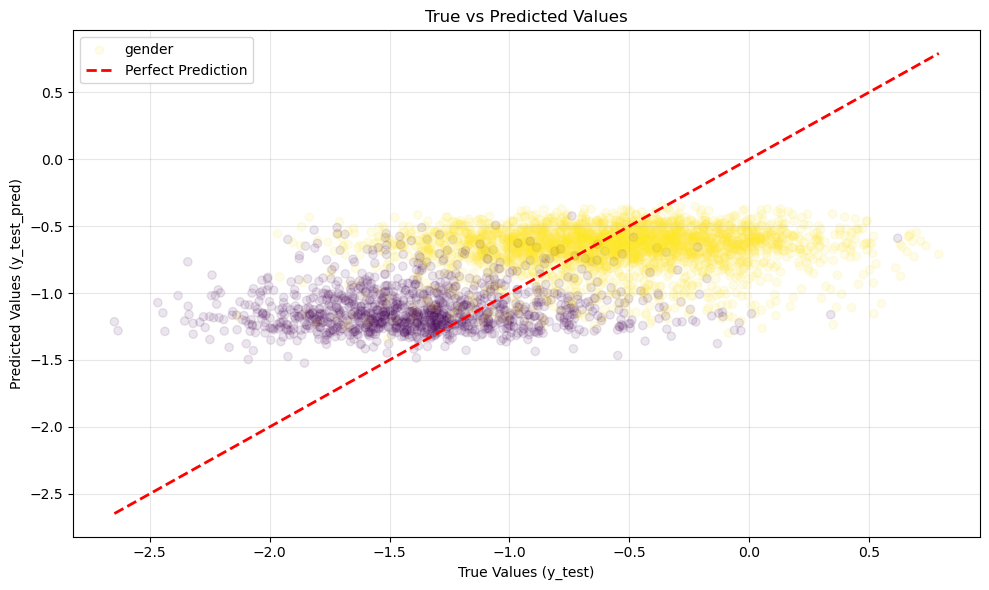

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_0, y_test_0_pred, alpha=0.1, c=(test_df.head(MAX_TEST_FILES)["gender"] == "m") * 1, 
                     cmap="viridis", label="gender")
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("True vs Predicted Values")

# Add a diagonal line for perfect predictions
min_val = min(y_test_0.min(), y_test_0_pred.min())
max_val = max(y_test_0.max(), y_test_0_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label="Perfect Prediction")

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
CREATION_TIME = time.strftime("%d.%m.%H.%M.%S", time.localtime())

MODEL_NAME = "stft_vgg16_fixed-{}-".format(CREATION_TIME) + VERSION

model.save(os.path.join(PROJECT_PATH, "models", f"{MODEL_NAME}.keras"))